In [1]:
# importing necessary libraries for data processing, data visualization and algorithms

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier

In [4]:
# getting the data

In [5]:
dftrain=pd.read_csv('train.csv')
dftest=pd.read_csv('test.csv')

In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
dftest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
# data visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

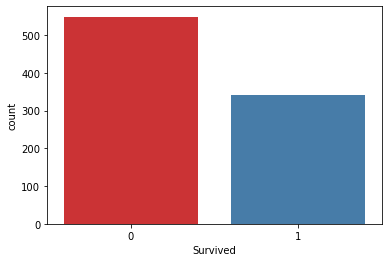

In [13]:
# plotting a countplot to visualize people who survived and who didn't
sns.countplot(data=dftrain,x='Survived',palette='Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

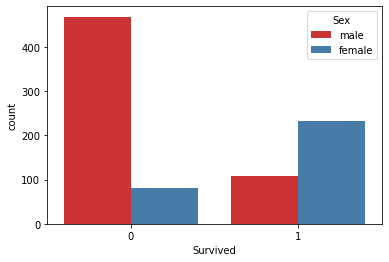

In [15]:
# plotting a countplot to visualize male and female who survived and who didn't
sns.countplot(data=dftrain,x='Survived',hue='Sex',palette='Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

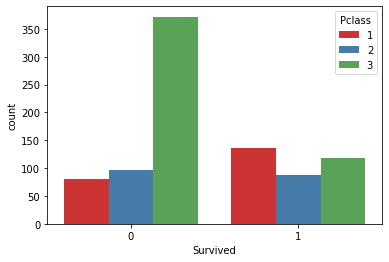

In [16]:
# plotting a countplot to visualize people belonging to different passenger classes who survived and who didn't
sns.countplot(data=dftrain,x='Survived',hue='Pclass',palette='Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

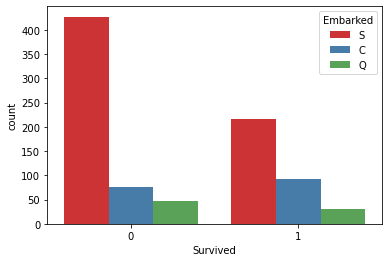

In [17]:
# plotting a countplot to visualize people who boarded the Titanic from different ports who survived and who didn't
sns.countplot(data=dftrain,x='Survived',hue='Embarked',palette='Set1')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

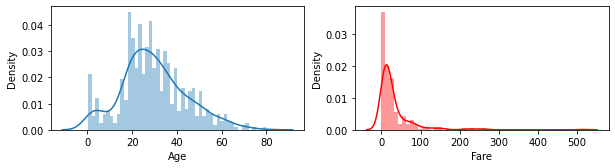

In [20]:
# plot to view the ages of people
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(dftrain['Age'],bins=50)
plt.subplot(2,2,2)
sns.distplot(dftrain['Fare'],bins=50,color='red')

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# preparing the data

In [22]:
# finding and removing NULL values for more accurate prediction
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# we can clearly observe that age and cabin have a lot of NULL values. Cabin has the most. We will drop Cabin column
dftrain.drop('Cabin',axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [27]:
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [28]:
# here above it is showing error because we run the drop cabin statement again. Since cabin was dropped when run the first time it is showing error when we run the second time since the column no more exists.

In [29]:
dftest.drop('Cabin',axis=1,inplace=True)

In [30]:
# converting the gender strings
# male->0
# female->1
# for easy classification

In [31]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
# Converting the string and character values of Embarked and Sex columns to numbers
dftrain.Embarked[dftrain.Embarked=='S']=0
dftrain.Embarked[dftrain.Embarked=='C']=1
dftrain.Embarked[dftrain.Embarked=='Q']=2

dftest.Embarked[dftest.Embarked=='S']=0
dftest.Embarked[dftest.Embarked=='C']=1
dftest.Embarked[dftest.Embarked=='Q']=2

dftrain.Sex[dftrain.Sex=='male']=0
dftrain.Sex[dftrain.Sex=='female']=1
dftest.Sex[dftest.Sex=='male']=0
dftest.Sex[dftest.Sex=='female']=1

In [33]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [34]:
# Create a variable(pass_ID) to store the passenger id to be used for submission
pass_ID=dftest['PassengerId']

In [35]:
# dropping unwanted columns
dftrain.drop(['PassengerId','Ticket'],axis=1,inplace=True)
dftest.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [36]:
# to fill the NaN(not a number) values in the columns with the mean of each column
dftrain['Age']=dftrain['Age'].fillna(np.mean(dftrain['Age']))
dftest['Fare']=dftest['Fare'].fillna(np.mean(dftest['Fare']))
dftest['Age']=dftest['Age'].fillna(np.mean(dftest['Age']))
dftrain['Embarked']=dftrain['Embarked'].fillna(0)

In [37]:
dftrain.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
dftest.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [39]:
# we have successfully tackled the NULL values issue by removing them and filling some values with the mean values

In [40]:
dftrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [41]:
# encoding the title column depending on the prefixes used
# next step is to perform feature engineering and bring in 2 new columns related to number of family members on board
# the above step needs to be done on both training and testing sets

In [42]:
df_title = [i.split(",")[1].split(".")[0].strip() for i in dftrain["Name"]]
dftrain["Title"] = pd.Series(df_title)
dftrain["Title"] = dftrain["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dftrain["Title"] = dftrain["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dftrain.drop('Name',axis=1,inplace=True)
dftrain['Familysize']=dftrain['SibSp']+dftrain['Parch']+1
dftrain['Alone'] = dftrain['Familysize'].map(lambda s: 1 if s == 1 else 0)

In [43]:
df_title = [i.split(",")[1].split(".")[0].strip() for i in dftest["Name"]]
dftest["Title"] = pd.Series(df_title)
dftest["Title"] = dftest["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dftest["Title"] = dftest["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dftest.drop('Name',axis=1,inplace=True)
dftest['Familysize']=dftest['SibSp']+dftest['Parch']+1
dftest['Alone'] = dftest['Familysize'].map(lambda s: 1 if s == 1 else 0)

In [44]:
dftrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,Alone
0,0,3,0,22.0,1,0,7.2500,0,2,2,0
1,1,1,1,38.0,1,0,71.2833,1,1,2,0
2,1,3,1,26.0,0,0,7.9250,0,1,1,1
3,1,1,1,35.0,1,0,53.1000,0,1,2,0
4,0,3,0,35.0,0,0,8.0500,0,2,1,1


In [45]:
dftest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,Alone
0,3,0,34.5,0,0,7.8292,2,2,1,1
1,3,1,47.0,1,0,7.0000,0,1,2,0
2,2,0,62.0,0,0,9.6875,2,2,1,1
3,3,0,27.0,0,0,8.6625,0,2,1,1
4,3,1,22.0,1,1,12.2875,0,1,3,0


In [46]:
# Splitting the dataset into train data and test data
X=dftrain.drop('Survived',axis=1)
y=dftrain['Survived']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
# Scaling the data
scaler=StandardScaler()
Xtrainscaled=scaler.fit_transform(Xtrain)
Xtestscaled=scaler.transform(Xtest)
dftestscaled=scaler.transform(dftest)

In [48]:
# using SVM(support vector machine) model to check accuracy
mod=svm.SVC()
mod.fit(Xtrainscaled,ytrain)
y1pred=mod.predict(Xtestscaled)
sc=accuracy_score(ytest,y1pred)
print('ACCURACY: {}%'.format(round(sc*100,3)))

ACCURACY: 83.209%


In [54]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(ytest, y1pred))
print("Recall:",recall_score(ytest, y1pred))

Precision: 0.875
Recall: 0.6936936936936937


In [55]:
# printing classification report
print(classification_report(ytest,y1pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       157
           1       0.88      0.69      0.77       111

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.83      0.83       268



In [56]:
# F1-score
from sklearn.metrics import f1_score
f1_score(ytest, y1pred)

0.7738693467336683

In [57]:
# therefore we prepared our data, scaled our data, split our data and trained our SVM model and got an accuracy of 83.2% for our model. 